In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Given Data
vector1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
vector2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])


In [3]:
print(f"\nVector 1 Length: {len(vector1)}")
print(f"Vector 2 Length: {len(vector2)}")
print(f"Vector 1: {vector1}")
print(f"Vector 2: {vector2}")



Vector 1 Length: 11
Vector 2 Length: 13
Vector 1: [2 3 4 6 8 7 6 5 4 3 2]
Vector 2: [2 4 6 7 7 6 5 5 4 3 2 2 1]


### **VISUALIZE BOTH VECTORS**

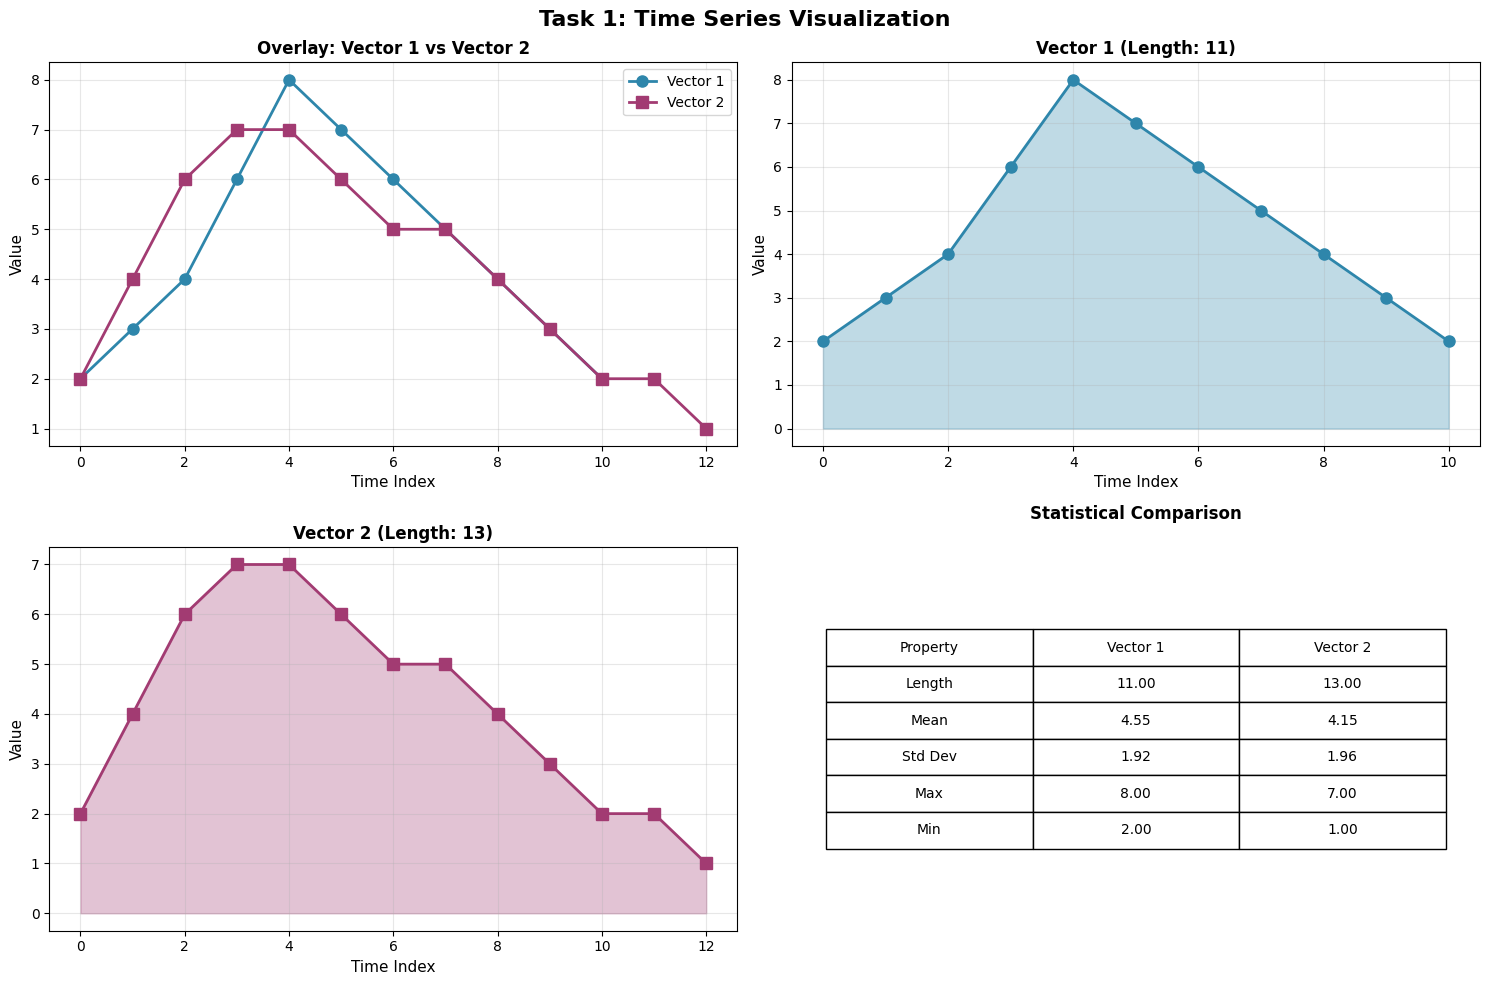

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Task 1: Time Series Visualization', fontsize=16, fontweight='bold')

# Plot 1: Both vectors overlayed
ax1 = axes[0, 0]
ax1.plot(vector1, 'o-', linewidth=2, markersize=8, label='Vector 1', color='#2E86AB')
ax1.plot(vector2, 's-', linewidth=2, markersize=8, label='Vector 2', color='#A23B72')
ax1.set_xlabel('Time Index', fontsize=11)
ax1.set_ylabel('Value', fontsize=11)
ax1.set_title('Overlay: Vector 1 vs Vector 2', fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Vector 1 separate
ax2 = axes[0, 1]
ax2.plot(vector1, 'o-', linewidth=2, markersize=8, color='#2E86AB')
ax2.fill_between(range(len(vector1)), vector1, alpha=0.3, color='#2E86AB')
ax2.set_xlabel('Time Index', fontsize=11)
ax2.set_ylabel('Value', fontsize=11)
ax2.set_title('Vector 1 (Length: 11)', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Vector 2 separate
ax3 = axes[1, 0]
ax3.plot(vector2, 's-', linewidth=2, markersize=8, color='#A23B72')
ax3.fill_between(range(len(vector2)), vector2, alpha=0.3, color='#A23B72')
ax3.set_xlabel('Time Index', fontsize=11)
ax3.set_ylabel('Value', fontsize=11)
ax3.set_title('Vector 2 (Length: 13)', fontweight='bold')
ax3.grid(True, alpha=0.3)

# Plot 4: Difference in characteristics
ax4 = axes[1, 1]
stats_data = {
    'Property': ['Length', 'Mean', 'Std Dev', 'Max', 'Min'],
    'Vector 1': [len(vector1), np.mean(vector1), np.std(vector1),
                 np.max(vector1), np.min(vector1)],
    'Vector 2': [len(vector2), np.mean(vector2), np.std(vector2),
                 np.max(vector2), np.min(vector2)]
}
ax4.axis('tight')
ax4.axis('off')
table = ax4.table(cellText=[[stats_data['Property'][i],
                             f"{stats_data['Vector 1'][i]:.2f}",
                             f"{stats_data['Vector 2'][i]:.2f}"]
                            for i in range(5)],
                  colLabels=['Property', 'Vector 1', 'Vector 2'],
                  cellLoc='center',
                  loc='center',
                  colWidths=[0.3, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
ax4.set_title('Statistical Comparison', fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

### **IMPLEMENT DTW AND COMPUTE COST MATRIX**

In [6]:
def dtw_algorithm(seq1, seq2, distance_metric=euclidean):
    n, m = len(seq1), len(seq2)

    # Initialize distance matrix (local costs)
    distance_matrix = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            distance_matrix[i, j] = abs(seq1[i] - seq2[j])

    # Initialize accumulated cost matrix
    cost_matrix = np.full((n, m), np.inf)
    cost_matrix[0, 0] = distance_matrix[0, 0]

    # Fill first row and column
    for i in range(1, n):
        cost_matrix[i, 0] = cost_matrix[i-1, 0] + distance_matrix[i, 0]
    for j in range(1, m):
        cost_matrix[0, j] = cost_matrix[0, j-1] + distance_matrix[0, j]

    # Fill the rest of the cost matrix using DP
    for i in range(1, n):
        for j in range(1, m):
            cost_matrix[i, j] = distance_matrix[i, j] + min(
                cost_matrix[i-1, j],      # Insertion
                cost_matrix[i, j-1],      # Deletion
                cost_matrix[i-1, j-1]     # Match
            )

    return cost_matrix, distance_matrix


Distance Matrix (Local Costs):
[[0. 2. 4. 5. 5. 4. 3. 3. 2. 1. 0. 0. 1.]
 [1. 1. 3. 4. 4. 3. 2. 2. 1. 0. 1. 1. 2.]
 [2. 0. 2. 3. 3. 2. 1. 1. 0. 1. 2. 2. 3.]
 [4. 2. 0. 1. 1. 0. 1. 1. 2. 3. 4. 4. 5.]
 [6. 4. 2. 1. 1. 2. 3. 3. 4. 5. 6. 6. 7.]
 [5. 3. 1. 0. 0. 1. 2. 2. 3. 4. 5. 5. 6.]
 [4. 2. 0. 1. 1. 0. 1. 1. 2. 3. 4. 4. 5.]
 [3. 1. 1. 2. 2. 1. 0. 0. 1. 2. 3. 3. 4.]
 [2. 0. 2. 3. 3. 2. 1. 1. 0. 1. 2. 2. 3.]
 [1. 1. 3. 4. 4. 3. 2. 2. 1. 0. 1. 1. 2.]
 [0. 2. 4. 5. 5. 4. 3. 3. 2. 1. 0. 0. 1.]]

Accumulated Cost Matrix:
[[ 0.  2.  6. 11. 16. 20. 23. 26. 28. 29. 29. 29. 30.]
 [ 1.  1.  4.  8. 12. 15. 17. 19. 20. 20. 21. 22. 24.]
 [ 3.  1.  3.  6.  9. 11. 12. 13. 13. 14. 16. 18. 21.]
 [ 7.  3.  1.  2.  3.  3.  4.  5.  7. 10. 14. 18. 23.]
 [13.  7.  3.  2.  3.  5.  6.  7.  9. 12. 16. 20. 25.]
 [18. 10.  4.  2.  2.  3.  5.  7. 10. 13. 17. 21. 26.]
 [22. 12.  4.  3.  3.  2.  3.  4.  6.  9. 13. 17. 22.]
 [25. 13.  5.  5.  5.  3.  2.  2.  3.  5.  8. 11. 15.]
 [27. 13.  7.  8.  8.  5.  3.  3.  2.  

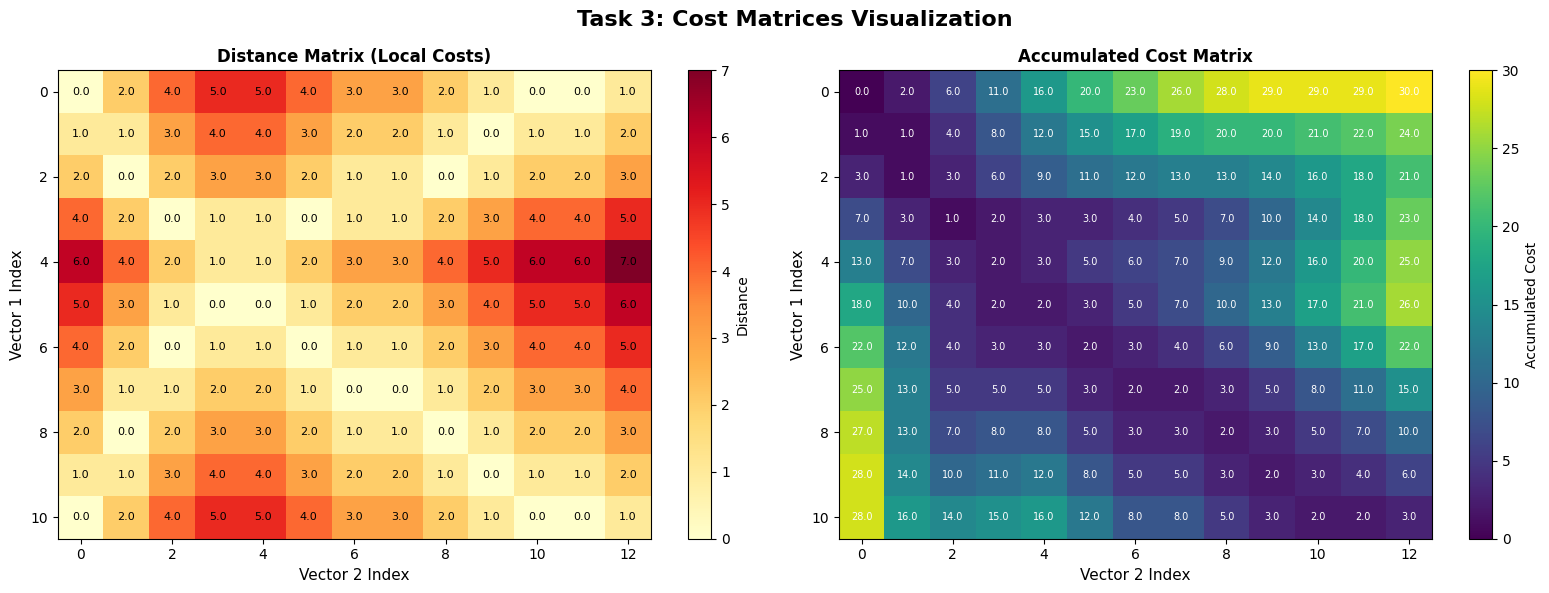

In [7]:
# Compute DTW
cost_matrix, distance_matrix = dtw_algorithm(vector1, vector2)
print("\nDistance Matrix (Local Costs):")
print(distance_matrix)
print("\nAccumulated Cost Matrix:")
print(cost_matrix)

# Visualize matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Task 3: Cost Matrices Visualization', fontsize=16, fontweight='bold')

# Distance Matrix
im1 = axes[0].imshow(distance_matrix, cmap='YlOrRd', aspect='auto')
axes[0].set_xlabel('Vector 2 Index', fontsize=11)
axes[0].set_ylabel('Vector 1 Index', fontsize=11)
axes[0].set_title('Distance Matrix (Local Costs)', fontweight='bold')
plt.colorbar(im1, ax=axes[0], label='Distance')

# Add values to cells
for i in range(len(vector1)):
    for j in range(len(vector2)):
        axes[0].text(j, i, f'{distance_matrix[i, j]:.1f}',
                    ha='center', va='center', fontsize=8)

# Accumulated Cost Matrix
im2 = axes[1].imshow(cost_matrix, cmap='viridis', aspect='auto')
axes[1].set_xlabel('Vector 2 Index', fontsize=11)
axes[1].set_ylabel('Vector 1 Index', fontsize=11)
axes[1].set_title('Accumulated Cost Matrix', fontweight='bold')
plt.colorbar(im2, ax=axes[1], label='Accumulated Cost')

# Add values to cells
for i in range(len(vector1)):
    for j in range(len(vector2)):
        axes[1].text(j, i, f'{cost_matrix[i, j]:.1f}',
                    ha='center', va='center', fontsize=7, color='white')

plt.tight_layout()
plt.show()

### **FIND AND VISUALIZE OPTIMAL WARPING PATH**

In [8]:
def find_warping_path(cost_matrix):
    n, m = cost_matrix.shape
    i, j = n - 1, m - 1
    path = [(i, j)]

    while i > 0 or j > 0:
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            # Choose minimum cost predecessor
            candidates = [
                cost_matrix[i-1, j-1],  # Diagonal
                cost_matrix[i-1, j],    # Up
                cost_matrix[i, j-1]     # Left
            ]
            min_idx = np.argmin(candidates)

            if min_idx == 0:
                i, j = i - 1, j - 1
            elif min_idx == 1:
                i = i - 1
            else:
                j = j - 1

        path.append((i, j))

    return path[::-1]  # Reverse to get path from start to end

# Find optimal path
warping_path = find_warping_path(cost_matrix)

In [9]:
print(f"\nWarping Path (length: {len(warping_path)}):")
print(warping_path)


Warping Path (length: 14):
[(0, 0), (1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (7, 7), (8, 8), (9, 9), (10, 10), (10, 11), (10, 12)]


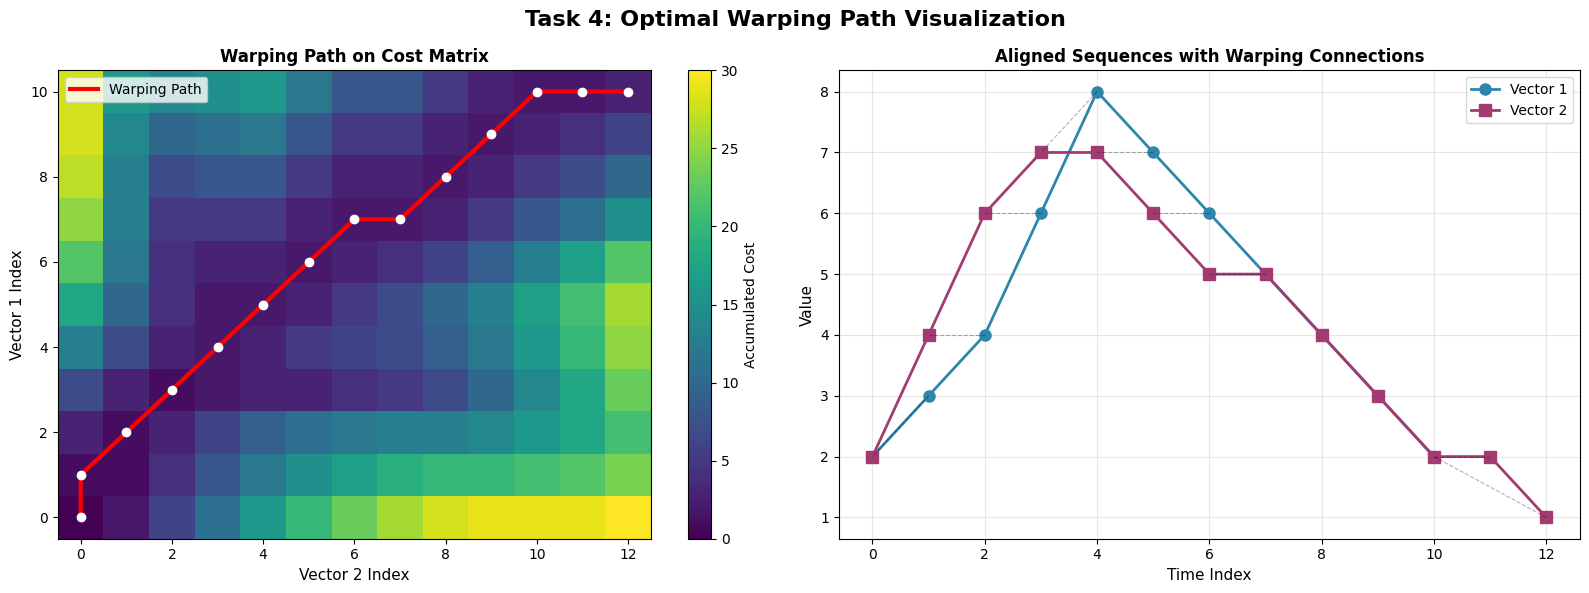

In [10]:

# Visualize warping path
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Task 4: Optimal Warping Path Visualization', fontsize=16, fontweight='bold')

# Plot 1: Warping path on cost matrix
im = axes[0].imshow(cost_matrix, cmap='viridis', aspect='auto', origin='lower')
path_i, path_j = zip(*warping_path)
axes[0].plot(path_j, path_i, 'r-', linewidth=3, label='Warping Path')
axes[0].plot(path_j, path_i, 'wo', markersize=6)
axes[0].set_xlabel('Vector 2 Index', fontsize=11)
axes[0].set_ylabel('Vector 1 Index', fontsize=11)
axes[0].set_title('Warping Path on Cost Matrix', fontweight='bold')
axes[0].legend(fontsize=10)
plt.colorbar(im, ax=axes[0], label='Accumulated Cost')

# Plot 2: Alignment visualization
axes[1].plot(vector1, 'o-', linewidth=2, markersize=8, label='Vector 1', color='#2E86AB')
axes[1].plot(vector2, 's-', linewidth=2, markersize=8, label='Vector 2', color='#A23B72')

# Draw alignment connections
for (i, j) in warping_path:
    axes[1].plot([i, j], [vector1[i], vector2[j]],
                'k--', alpha=0.3, linewidth=0.8)

axes[1].set_xlabel('Time Index', fontsize=11)
axes[1].set_ylabel('Value', fontsize=11)
axes[1].set_title('Aligned Sequences with Warping Connections', fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## **CALCULATE DTW DISTANCE**

In [11]:
dtw_distance = cost_matrix[-1, -1]
print(f"\nDTW Distance: {dtw_distance:.4f}")
print(f"\nNormalized DTW Distance: {dtw_distance / len(warping_path):.4f}")
print(f"(Normalized by warping path length)")


DTW Distance: 3.0000

Normalized DTW Distance: 0.2143
(Normalized by warping path length)


### **ADVANCED ANALYSIS**

In [12]:
# 1. Compute alternative distance metrics
def dtw_with_constraints(seq1, seq2, window_size=None):
    """DTW with Sakoe-Chiba band constraint"""
    n, m = len(seq1), len(seq2)
    cost = np.full((n, m), np.inf)
    cost[0, 0] = abs(seq1[0] - seq2[0])

    if window_size is None:
        window_size = max(n, m)

    for i in range(1, n):
        for j in range(max(1, i - window_size), min(m, i + window_size + 1)):
            dist = abs(seq1[i] - seq2[j])
            cost[i, j] = dist + min(cost[i-1, j], cost[i, j-1], cost[i-1, j-1])

    return cost[-1, -1]

In [13]:
# 2. Compute alignment quality metrics
def alignment_metrics(seq1, seq2, path):
    """Compute various alignment quality metrics"""
    aligned_seq1 = [seq1[i] for i, j in path]
    aligned_seq2 = [seq2[j] for i, j in path]

    # Pearson correlation of aligned sequences
    correlation = np.corrcoef(aligned_seq1, aligned_seq2)[0, 1]

    # Mean absolute error
    mae = np.mean(np.abs(np.array(aligned_seq1) - np.array(aligned_seq2)))

    # Root mean square error
    rmse = np.sqrt(np.mean((np.array(aligned_seq1) - np.array(aligned_seq2))**2))

    return correlation, mae, rmse

correlation, mae, rmse = alignment_metrics(vector1, vector2, warping_path)

In [14]:
print(f"   - Pearson Correlation: {correlation:.4f}")
print(f"   - Mean Absolute Error: {mae:.4f}")
print(f"   - Root Mean Square Error: {rmse:.4f}")


   - Pearson Correlation: 0.9780
   - Mean Absolute Error: 0.2143
   - Root Mean Square Error: 0.4629


In [15]:
# 3. Window-constrained DTW comparison
window_sizes = [2, 3, 5, None]
print(f"\n2. DTW WITH SAKOE-CHIBA BAND CONSTRAINT:")
for w in window_sizes:
    w_dist = dtw_with_constraints(vector1, vector2, w)
    w_label = "Unconstrained" if w is None else f"Window={w}"
    print(f"   - {w_label:20s}: DTW Distance = {w_dist:.4f}")

# 4. Warping path analysis
vertical_moves = sum(1 for i in range(1, len(warping_path))
                    if warping_path[i][0] > warping_path[i-1][0]
                    and warping_path[i][1] == warping_path[i-1][1])
horizontal_moves = sum(1 for i in range(1, len(warping_path))
                      if warping_path[i][1] > warping_path[i-1][1]
                      and warping_path[i][0] == warping_path[i-1][0])
diagonal_moves = sum(1 for i in range(1, len(warping_path))
                    if warping_path[i][0] > warping_path[i-1][0]
                    and warping_path[i][1] > warping_path[i-1][1])


2. DTW WITH SAKOE-CHIBA BAND CONSTRAINT:
   - Window=2            : DTW Distance = 3.0000
   - Window=3            : DTW Distance = 3.0000
   - Window=5            : DTW Distance = 3.0000
   - Unconstrained       : DTW Distance = 3.0000


In [16]:
print(f"   - Total Path Length: {len(warping_path)}")
print(f"   - Diagonal Moves: {diagonal_moves} ({diagonal_moves/len(warping_path)*100:.1f}%)")
print(f"   - Vertical Moves: {vertical_moves} ({vertical_moves/len(warping_path)*100:.1f}%)")
print(f"   - Horizontal Moves: {horizontal_moves} ({horizontal_moves/len(warping_path)*100:.1f}%)")

   - Total Path Length: 14
   - Diagonal Moves: 9 (64.3%)
   - Vertical Moves: 1 (7.1%)
   - Horizontal Moves: 3 (21.4%)


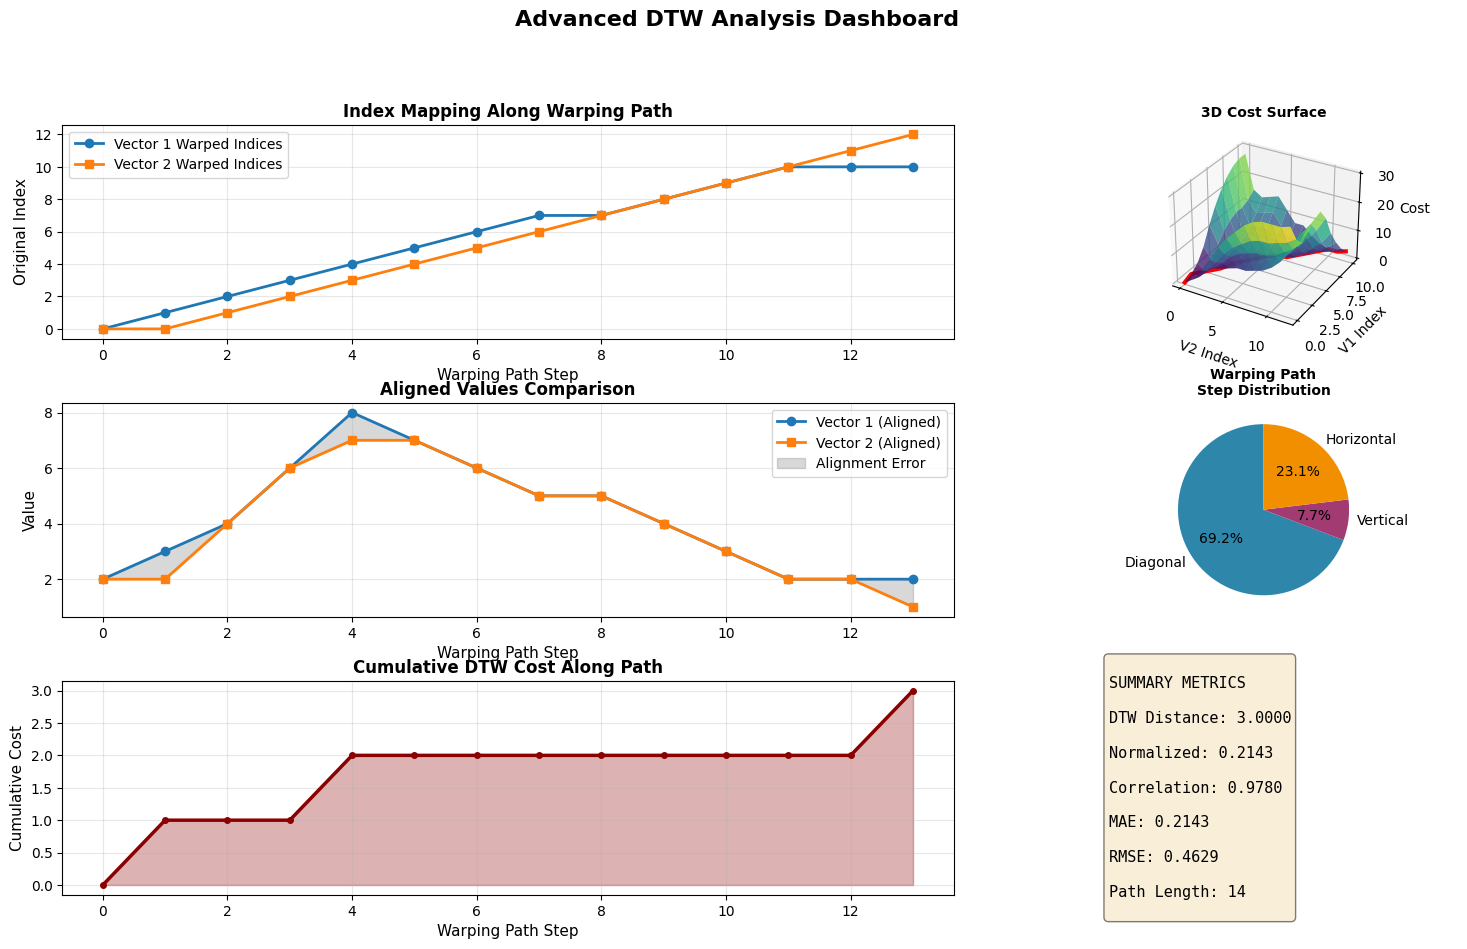

In [17]:
# Advanced Visualization
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Warped alignment comparison
ax1 = fig.add_subplot(gs[0, :2])
aligned_indices1 = [i for i, j in warping_path]
aligned_indices2 = [j for i, j in warping_path]
ax1.plot(aligned_indices1, label='Vector 1 Warped Indices', marker='o', linewidth=2)
ax1.plot(aligned_indices2, label='Vector 2 Warped Indices', marker='s', linewidth=2)
ax1.set_xlabel('Warping Path Step', fontsize=11)
ax1.set_ylabel('Original Index', fontsize=11)
ax1.set_title('Index Mapping Along Warping Path', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Aligned values comparison
ax2 = fig.add_subplot(gs[1, :2])
aligned_vals1 = [vector1[i] for i, j in warping_path]
aligned_vals2 = [vector2[j] for i, j in warping_path]
ax2.plot(aligned_vals1, 'o-', label='Vector 1 (Aligned)', linewidth=2, markersize=6)
ax2.plot(aligned_vals2, 's-', label='Vector 2 (Aligned)', linewidth=2, markersize=6)
ax2.fill_between(range(len(aligned_vals1)), aligned_vals1, aligned_vals2,
                 alpha=0.3, color='gray', label='Alignment Error')
ax2.set_xlabel('Warping Path Step', fontsize=11)
ax2.set_ylabel('Value', fontsize=11)
ax2.set_title('Aligned Values Comparison', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Cumulative alignment cost
ax3 = fig.add_subplot(gs[2, :2])
cumulative_cost = [cost_matrix[i, j] for i, j in warping_path]
ax3.plot(cumulative_cost, linewidth=2.5, color='darkred', marker='o', markersize=4)
ax3.fill_between(range(len(cumulative_cost)), cumulative_cost, alpha=0.3, color='darkred')
ax3.set_xlabel('Warping Path Step', fontsize=11)
ax3.set_ylabel('Cumulative Cost', fontsize=11)
ax3.set_title('Cumulative DTW Cost Along Path', fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. 3D surface plot of cost matrix
ax4 = fig.add_subplot(gs[0, 2], projection='3d')
X, Y = np.meshgrid(range(len(vector2)), range(len(vector1)))
ax4.plot_surface(X, Y, cost_matrix, cmap='viridis', alpha=0.8)
path_i, path_j = zip(*warping_path)
path_costs = [cost_matrix[i, j] for i, j in warping_path]
ax4.plot(path_j, path_i, path_costs, 'r-', linewidth=3, label='Warping Path')
ax4.set_xlabel('V2 Index')
ax4.set_ylabel('V1 Index')
ax4.set_zlabel('Cost')
ax4.set_title('3D Cost Surface', fontweight='bold', fontsize=10)

# 5. Step type distribution
ax5 = fig.add_subplot(gs[1, 2])
step_types = ['Diagonal', 'Vertical', 'Horizontal']
step_counts = [diagonal_moves, vertical_moves, horizontal_moves]
colors_pie = ['#2E86AB', '#A23B72', '#F18F01']
ax5.pie(step_counts, labels=step_types, autopct='%1.1f%%', startangle=90, colors=colors_pie)
ax5.set_title('Warping Path\nStep Distribution', fontweight='bold', fontsize=10)

# 6. Metrics summary
ax6 = fig.add_subplot(gs[2, 2])
ax6.axis('off')
metrics_text = f"""
SUMMARY METRICS

DTW Distance: {dtw_distance:.4f}

Normalized: {dtw_distance/len(warping_path):.4f}

Correlation: {correlation:.4f}

MAE: {mae:.4f}

RMSE: {rmse:.4f}

Path Length: {len(warping_path)}
"""
ax6.text(0.1, 0.5, metrics_text, fontsize=11, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         family='monospace')

plt.suptitle('Advanced DTW Analysis Dashboard', fontsize=16, fontweight='bold', y=0.995)
plt.show()